In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import math


%matplotlib inline

data = []
with open('ex2data2.txt') as fp:
    line = fp.readline()
    while line:
        line = fp.readline()
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        lineArr = line.split(',')
        try:
            lineArr2 = [float(lineArr[0]), float(lineArr[1]), float(lineArr[2])]
        except ValueError:
            pass
        data.append(lineArr2)
df = pd.DataFrame(data, columns=['x1', 'x2', 'label'])
df = df.sample(frac=1, replace=True)

X = []
Y = []
for t in df.itertuples():
    currentx = np.array([t[1], t[2]]).T
    X.append(currentx)
    Y.append(t[3])

X = np.matrix(X).T
Y = np.matrix(Y).T

# Visualizing our data

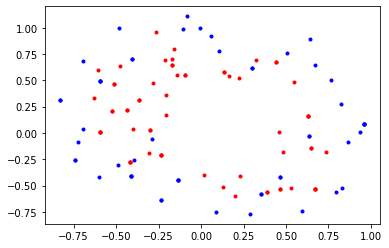

In [278]:
df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]
plt.plot(df0['x1'], df0['x2'], 'b.')
plt.plot(df1['x1'], df1['x2'], 'r.')
plt.show()

# Our Neural Network will be structured like the following diagram:
We have 2 input features,
        3 neurons in the hidden layer,
        and 1 output neuron

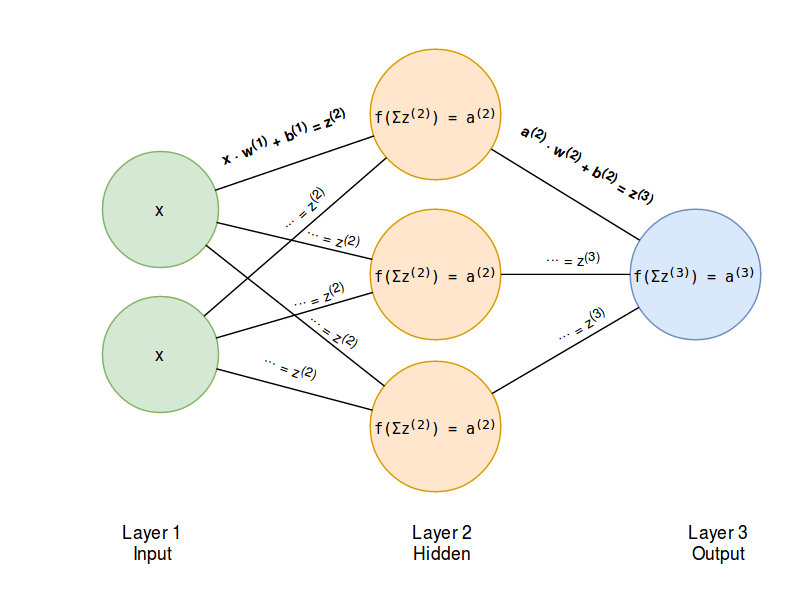

# Creating our Functions needed for Forward and Back Propogation

In [279]:
def tanhActivation(z1Arr):
    return np.tanh(z1Arr)

def sigmoid(z2Arr):
    return np.array(1/(1+np.power(math.e, -z2Arr)))

def costFunction(A3):
    vectorCost = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3))
    cost = -np.sum(vectorCost)/m
    return cost

def tanhPrime(ZArr):
    return 1 - np.power((tanhActivation(ZArr)), 2)

# Initialize weights to a random decimal number between -1 and 1

In [327]:
#------------------
#input layer
nInLayer = 2
#------------------

#------------------
#hidden layer 1
nHiddenLayer1 = 4
#hidden layer 2
nHiddenLayer2 = 4
#------------------

#------------------
#output layer     
nOutLayer = 1
#------------------

W1 = 2 * np.random.randn(nHiddenLayer1, nInLayer) - 1
W2 = 2 * np.random.rand(nHiddenLayer2, nHiddenLayer1) - 1
W3 = 2 * np.random.rand(nOutLayer, nHiddenLayer2) - 1


B1 = 2 * np.random.randn(nHiddenLayer1, 1) - 1
B2 = 2 * np.random.randn(nHiddenLayer2, 1) - 1
B3 = 2 * np.random.randn(nOutLayer, 1) - 1

# Cost before training weights

In [333]:
Z1 = np.dot(W1, X) + B1
A1 = tanhActivation(Z1)
Z2 = np.dot(W2, A1) + B2
A2 = tanhActivation(Z2)
Z3 = np.dot(W3, A2).T + B3
A3 = sigmoid(Z3).T
print("The total cost of our function before training weights:")
print(costFunction(A3))

The total cost of our function before training weights:
5.83097684610468


In [329]:
a = 0.003

#forward propogation on entire training set
m = 1652
iterations = 40000

for it in range(iterations):
    Z1 = np.dot(W1, X) + B1
    A1 = tanhActivation(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = tanhActivation(Z2)
    Z3 = np.dot(W3, A2).T + B3
    A3 = sigmoid(Z3).T
  
    #BACKPROP
    
    #Output layer to 2nd hidden layer
    dZ3 = A3.T-Y
    dW3 = np.matmul(dZ3.T, A2.T)/m
    dB3 = np.sum(dZ3, axis=1)/m
    
    #2nd hidden layer to 1st hidden layer
    dZ2 = np.multiply(np.matmul(np.matrix(W3.T), np.matrix(dZ3).T), tanhPrime(np.matrix(Z2)))
    dW2 = np.matmul(dZ2, A1.T)/m
    dB2 = np.sum(dZ2, axis=1)/m

    #1st hidden layer to input layer
    dZ1 = np.multiply(np.matmul(np.matrix(W2.T), np.matrix(dZ2)), tanhPrime(np.matrix(Z1)))
    dW1 = np.matmul(dZ1, X.T)/m
    dB1 = np.sum(dZ1, axis=1)/m

    
    
    #UPDATE WEIGHTS AND BIASES:
    W1 = W1 - (a*dW1)
    W2 = W2 - (a*dW2)
    W3 = W3 - (a*dW3)
    B1 = B1 - (a*dB1)
    B2 = B2 - (a*dB2)
    B3 = B3 - (a*dB3)

    if it % 1000 == 0:
        print("Cost at iteration #" + str(it) + ": " + str(costFunction(A3)))
    


Cost at iteration #0: 7.295192404397722
Cost at iteration #1000: 6.916885749087671
Cost at iteration #2000: 6.631297714492407
Cost at iteration #3000: 6.418982169907022
Cost at iteration #4000: 6.2629365882657515
Cost at iteration #5000: 6.149168051087543
Cost at iteration #6000: 6.066650671275109
Cost at iteration #7000: 6.006963016074533
Cost at iteration #8000: 5.963814134904668
Cost at iteration #9000: 5.932577917094712
Cost at iteration #10000: 5.909889993513923
Cost at iteration #11000: 5.893322524248603
Cost at iteration #12000: 5.881132937371516
Cost at iteration #13000: 5.872075151798522
Cost at iteration #14000: 5.865260351518751
Cost at iteration #15000: 5.860055581515481
Cost at iteration #16000: 5.856010518466023
Cost at iteration #17000: 5.85280489731375
Cost at iteration #18000: 5.850210920402278
Cost at iteration #19000: 5.848066455730352
Cost at iteration #20000: 5.846255966249694
Cost at iteration #21000: 5.8446969600439616
Cost at iteration #22000: 5.843330373687046


In [330]:
print(Y.shape)
print(W3.shape)
print(dZ3.shape)
print(tanhPrime(np.matrix(Z2)).shape)

(118, 1)
(1, 4)
(118, 1)
(4, 118)


# Compute the Cost of our Neural Network

In [331]:
Z1 = np.dot(W1, X) + B1
A1 = tanhActivation(Z1)
Z2 = np.dot(W2, A1) + B2
A2 = tanhActivation(Z2)
Z3 = np.dot(W3, A2).T + B3
A3 = sigmoid(Z3).T

print("The total cost of our function with our trained weights:")
print(costFunction(A3))

The total cost of our function with our trained weights:
0.21132018838914743


# Evaluate our Neural Network on some data

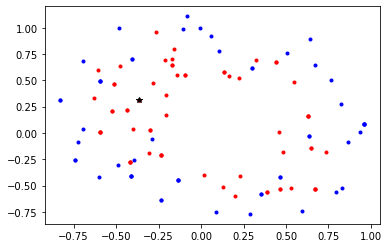

The Neural Network is 56.39% confident that our test data point is a red point.
A Red Point is the Neural Networks classification


In [334]:
x1 = X[0, 42]
x2 = X[1, 42]

df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]
plt.plot(df0['x1'], df0['x2'], 'b.')
plt.plot(df1['x1'], df1['x2'], 'r.')
plt.plot(x1, x2, 'k*')
plt.show()

x = np.matrix([x1, x2]).T

z1 = np.dot(W1, x) + B1
a1 = tanhActivation(z1)
z2 = np.dot(W2, a1) + B2
a2 = tanhActivation(z2)
z3 = np.dot(W3, a2) + B3
a3 = sigmoid(z3)

if (a3[0][0]*100) > 50:
    print("The Neural Network is " + str(round((a3[0][0]*100), 2)) + "% confident that our test data point is a red point.\nA Red Point is the Neural Networks classification")
else:
    print("The Neural Network is " + str(round(100-(a3[0][0]*100), 2)) + "% confident that our test data point is a blue point.\nA Blue Point is the Neural Networks classification")
